imports 48hr forecast for PR

In [1]:
import requests
import geopandas as gpd

# Construct the query URL
# this is the url for the 18 hour forecast of the NWM. Then make sure to add /0/query to the end of the url
# e.g. https://url_here/0/query
query_url = "https://maps.water.noaa.gov/server/rest/services/nwm/srf_48hr_max_high_flow_magnitude_prvi/MapServer/0/query"
params = {
    'where': '1=1',
    'outFields': '*',
    'outSR': '4326',  # Specify output spatial reference if needed
    'f': 'geojson',  # Request geojson output
    'returnGeometry': 'true'
}

# Make the request
response = requests.get(query_url, params=params)

# Convert to GeoDataFrame
predictions = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

print(predictions.head())


                                            geometry feature_id  strm_order  \
0  LINESTRING (-66.47984 18.20966, -66.48018 18.2...  800037652         2.0   
1  LINESTRING (-66.45972 18.29469, -66.45976 18.2...  800039838         3.0   
2  LINESTRING (-66.50011 18.28239, -66.50032 18.2...  800029012         4.0   
3  LINESTRING (-67.03995 18.29314, -67.04013 18.2...  800028406         5.0   
4  LINESTRING (-66.90744 18.25315, -66.90742 18.2...  800024267         4.0   

                   name    huc6 state  nwm_vers           reference_time  \
0         Río Matrullas  210100  PRVI       3.0  2024-06-27 06:00:00 UTC   
1             Río Bauta  210100  PRVI       3.0  2024-06-27 06:00:00 UTC   
2        Río Toro Negro  210100  PRVI       3.0  2024-06-27 06:00:00 UTC   
3  Río Grande de Añasco  210100  PRVI       3.0  2024-06-27 06:00:00 UTC   
4            Río Blanco  210100  PRVI       3.0  2024-06-27 06:00:00 UTC   

   max_flow recur_cat  high_water_threshold  flow_100yr  flow_50yr  

C:\Users\Lyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
C:\Users\Lyn\AppData\Local\Temp\ipykernel_2316\4089502556.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([round(val, 2) for val in ax.get_xticks()], rotation=45)
C:\Users\Lyn\AppData\Local\Temp\ipykernel_2316\4089502556.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([round(val, 2) for val in ax.get_yticks()])


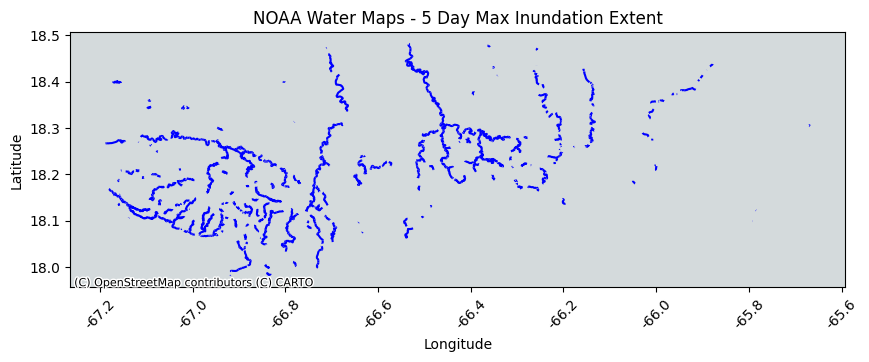

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import contextily as ctx

# Create a subplot with specified figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the predictions GeoDataFrame on the created axes object
# Ensure to specify the ax parameter to plot on the same axes
predictions.plot(ax=ax, color='blue', edgecolor='black')

# Add a basemap to the same axes object
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Adjust x and y axis labels to longitude and latitude
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Convert axis labels to degrees and set rotation for better readability
ax.set_xticklabels([round(val, 2) for val in ax.get_xticks()], rotation=45)
ax.set_yticklabels([round(val, 2) for val in ax.get_yticks()])

# Set plot title and labels for axes
plt.title('NOAA Water Maps 48Hr flow prediction PR')

# Display the combined plot
plt.show()

In [3]:
#Export GeoDataFrame as a Shapefile
predictions.to_file("C:/Users/Lyn/Documents/ArcGIS/CUAHSI SI 2024/PR/48hr_prediction_06272024.shp")

C:\Users\Lyn\AppData\Local\Temp\ipykernel_2316\2532717079.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  predictions.to_file("C:/Users/Lyn/Documents/ArcGIS/CUAHSI SI 2024/PR/48hr_prediction_06272024.shp")
